< Telco Customer Churn Dataset >

Dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

(1) Demographic Information

gender: Whether the customer is a female or a male (Female, Male)
SeniorCitizen: Whether the customer is a senior citizen or not (0, 1)
Partner: Whether the customer has a partner or not (Yes, No)
Dependents: Whether the customer has dependents or not (Yes, No)

(2) Customer Account Information

tenure: Number of months the customer has stayed with the company (Multiple different numeric values)
Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year)
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic))
MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values)
TotalCharges: The total amount charged to the customer (Multiple different numeric values)

(3) Service Information

PhoneService: Whether the customer has a phone service or not (Yes, No)
MultipleLines: Whether the customer has multiple lines or not (No phone service, No, Yes)
InternetServices: Whether the customer is subscribed to Internet service with the company (DSL, Fiber optic, No)
OnlineSecurity: Whether the customer has online security or not (No internet service, No, Yes)
OnlineBackup: Whether the customer has online backup or not (No internet service, No, Yes)
DeviceProtection: Whether the customer has device protection or not (No internet service, No, Yes)
TechSupport: Whether the customer has tech support or not (No internet service, No, Yes)
StreamingTV: Whether the customer has streaming TV or not (No internet service, No, Yes)
StreamingMovies: Whether the customer has streaming movies or not (No internet service, No, Yes)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
                            f1_score, confusion_matrix ,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler ,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Loading & Preprocessing

In [2]:
data =pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv") 
churn = data.copy()
churn.drop("customerID",axis = 1, inplace = True)
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn["TotalCharges"] =pd.to_numeric(churn.TotalCharges, errors = 'coerce')
print(f"no. of missing values: {churn.TotalCharges.isna().sum():d}")
churn[churn.TotalCharges.isna()]

no. of missing values: 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [4]:
cat_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
number_list = ['tenure','MonthlyCharges', 'TotalCharges']

for col in cat_list: #Checking Data
    print(col)
    print(churn[col].value_counts())
    print("-------------------------------------------------")

gender
Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet serv

In [5]:
target = churn.pop("Churn")
target = (target == "Yes").astype(int)

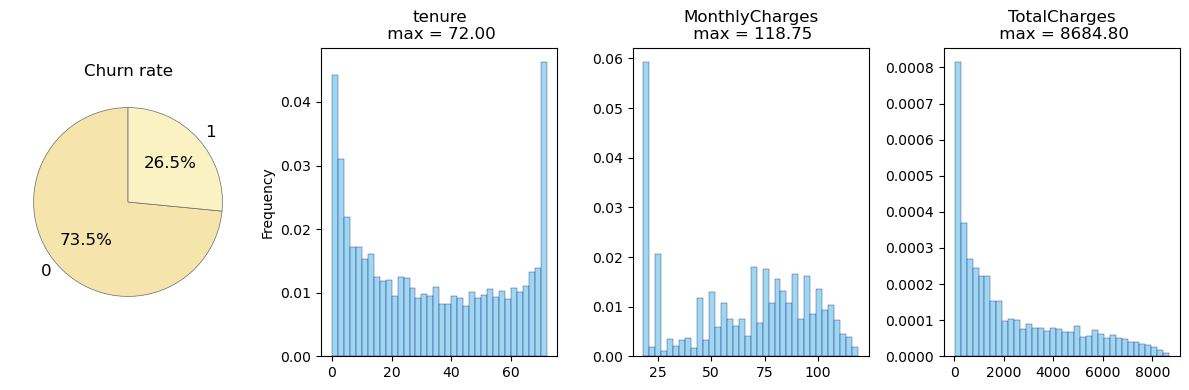

In [6]:
fig, ax = plt.subplots(1,4,figsize =(12,4))

unique, counts = np.unique(target, return_counts = True)
ax[0].pie(counts, labels = unique, autopct = "%.1f%%",
         colors = ["#F6E4AD","#FAF2C3"], 
         startangle = 90, textprops = {'fontsize':12},
         wedgeprops = {'edgecolor':'dimgray','linewidth':.5})
ax[0].set_title("Churn rate", fontsize = 12)

for i , var in enumerate(number_list):
    churn[var].plot(kind = "hist", bins = 36, density = True,
                   color = "skyblue", alpha = .8,
                   edgecolor = "navy", linewidth = .3, ax=ax[i+1])
    ax[i+1].set_title(f"{var}\n max = {churn[var].max():.2f}", fontsize = 12)
ax[2].set_ylabel("") ; ax[3].set_ylabel("")
fig.tight_layout()

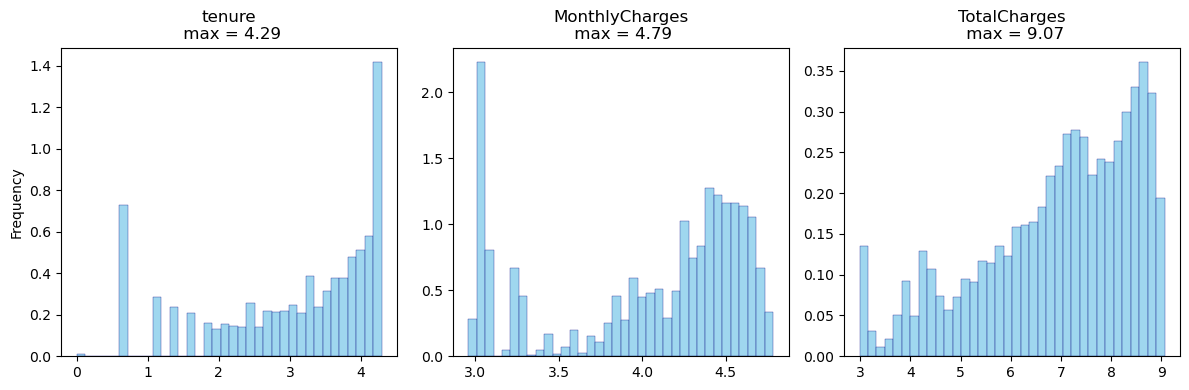

In [7]:
log_churn = np.log1p(churn[number_list])

fig, ax = plt.subplots(1,3,figsize =(12,4))

for i , var in enumerate(number_list):
    log_churn[var].plot(kind = "hist", bins = 36, density = True,
                   color = "skyblue", alpha = .8,
                   edgecolor = "navy", linewidth = .3, ax=ax[i])
    ax[i].set_title(f"{var}\n max = {log_churn[var].max():.2f}", fontsize = 12)
ax[2].set_ylabel("") ; ax[1].set_ylabel("")
fig.tight_layout()

Text(0.5, 0.98, 'Catagorical Variables')

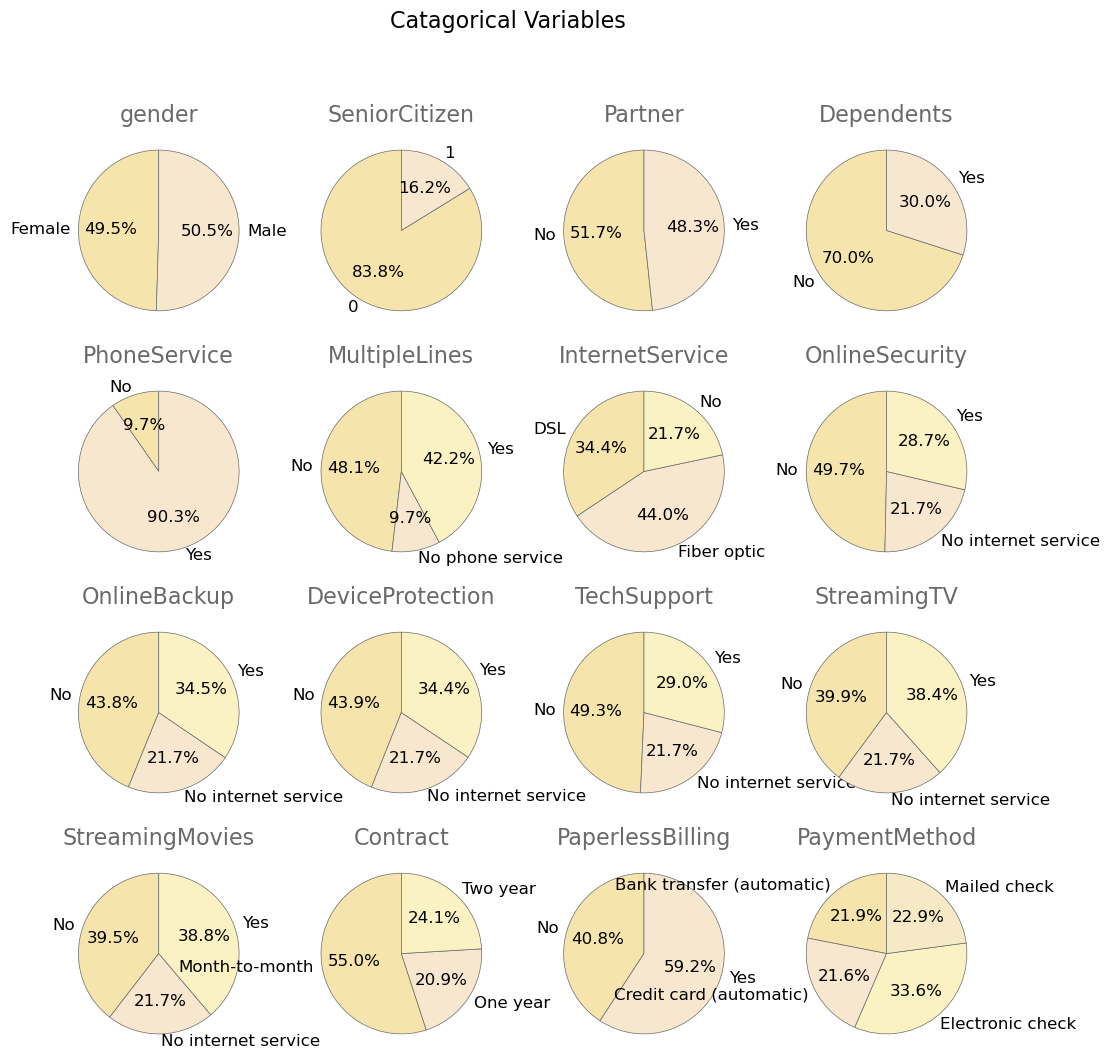

In [8]:
fig, ax = plt.subplots(4,4,figsize =(12,12))
ax= ax.flatten()

colors = ["#F6E4AD","#f7e7ce","#FAF2C3","#F6EAC6"]

for i , var in enumerate(cat_list):
    
    unique, counts = np.unique(churn.loc[:,var], return_counts = True)
    
    ax[i].pie(counts, labels = unique, autopct = "%.1f%%", colors = colors, 
             startangle = 90, textprops = {'fontsize':12},
             wedgeprops = {'edgecolor':'dimgray','linewidth':.5})
    ax[i].set_title(cat_list[i], fontsize = 16, color = "dimgray")    
    
fig.suptitle("Catagorical Variables",fontsize = 16)
# fig.tight_layout()

In [9]:
cat_cols = pd.get_dummies(churn[cat_list], drop_first = True)
features = pd.concat((churn[number_list], cat_cols), axis = 1)
features.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [10]:
features.isnull().sum()

tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
SeniorCitizen                             0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [11]:
features[['tenure','TotalCharges','MonthlyCharges']] 
#MonthlyCharges * tenure = TotalCharges (approximately) -> We can imputate TotalCharges

,tenure,TotalCharges,MonthlyCharges
0,1,29.85,29.85
1,34,1889.50,56.95
2,2,108.15,53.85
3,45,1840.75,42.30
4,2,151.65,70.70
...,...,...,...
7038,24,1990.50,84.80
7039,72,7362.90,103.20
7040,11,346.45,29.60
7041,4,306.60,74.40


In [12]:
# Imputation
temp = features[['tenure','TotalCharges','MonthlyCharges']]
indexs = temp[temp['TotalCharges'].isnull() == True].index
for index in indexs:
    features['TotalCharges'][features.index == index] \
    = features['MonthlyCharges'] * features['tenure']

In [13]:
features.isnull().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
SeniorCitizen                            0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

<AxesSubplot:>

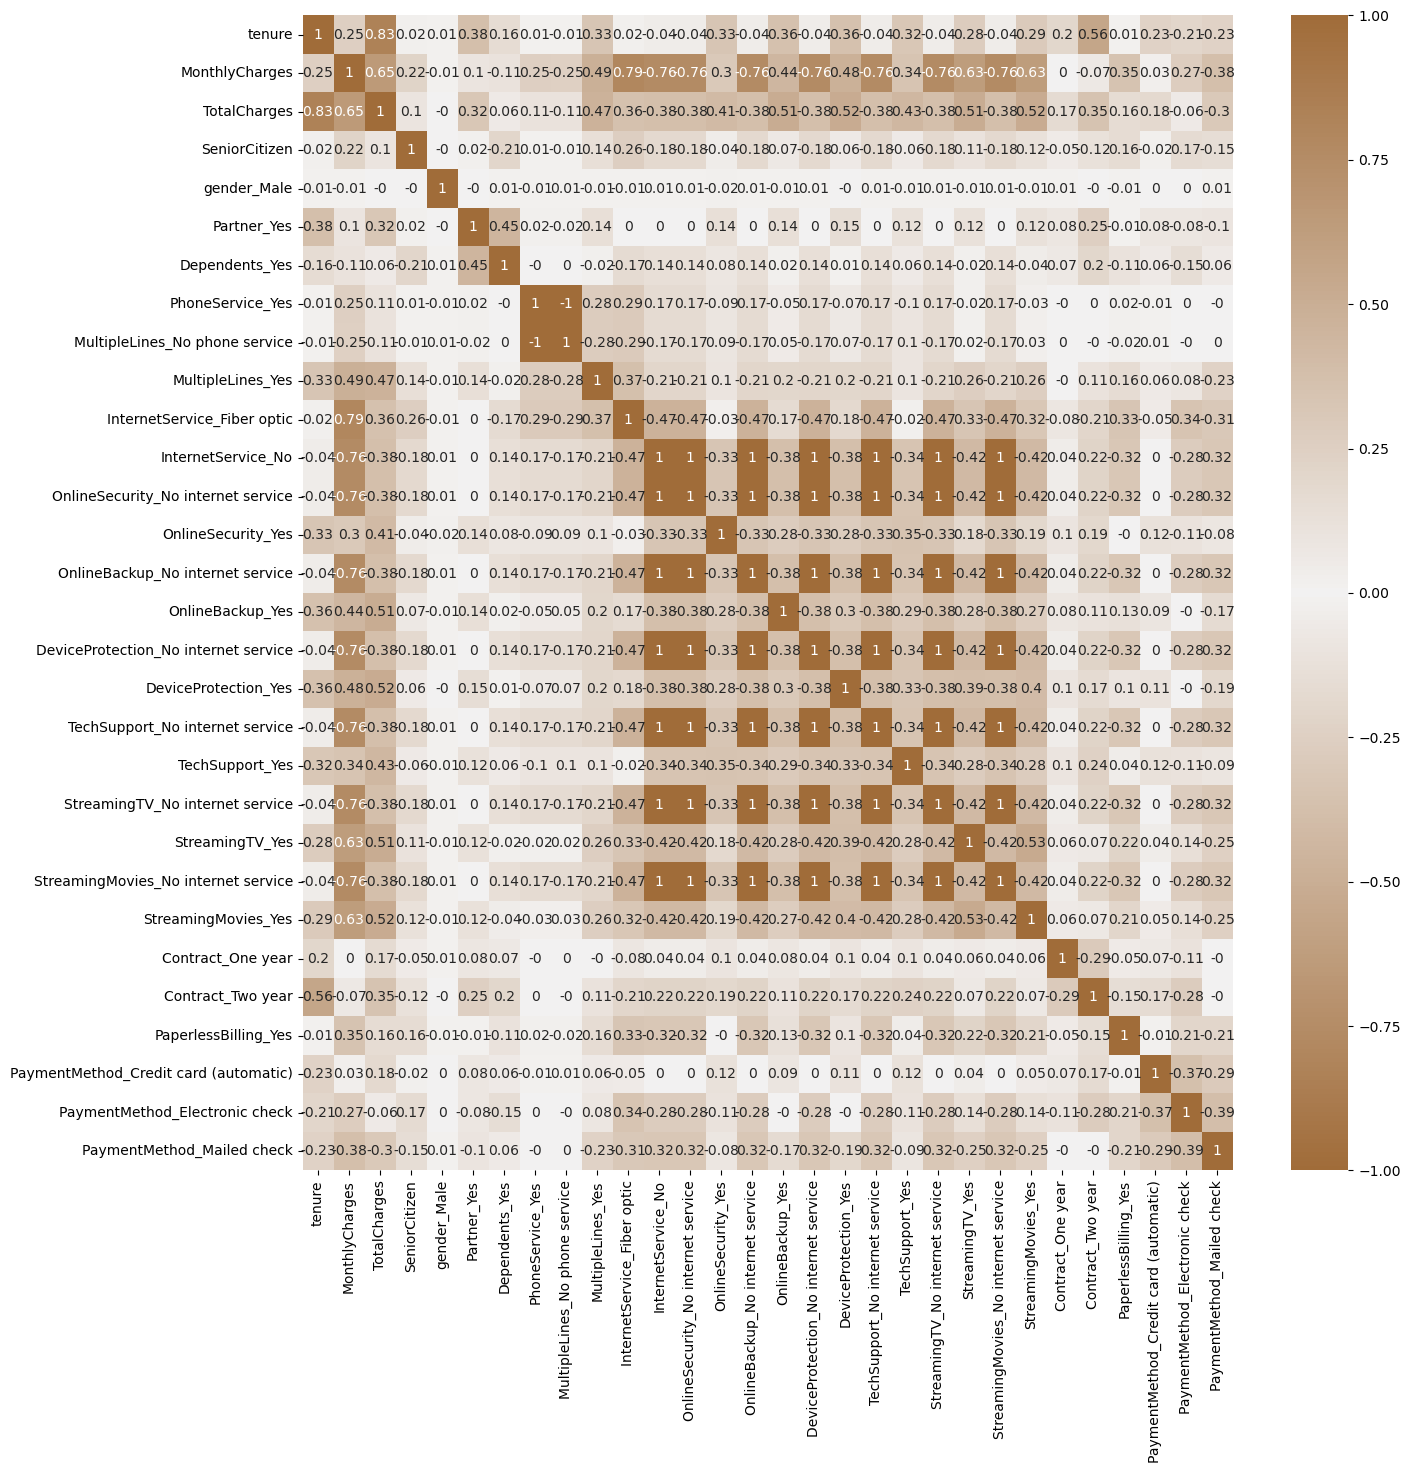

In [14]:
cmap = sns.diverging_palette(42,42,as_cmap = True)
plt.figure(figsize =(15,15))
sns.heatmap(features.corr().round(2),annot= True, cmap =cmap)

In [15]:
common_values = [col for col in features.columns if "No internet service" in col or "No phone" in col]
features.drop(common_values, axis = 1, inplace = True)

<AxesSubplot:>

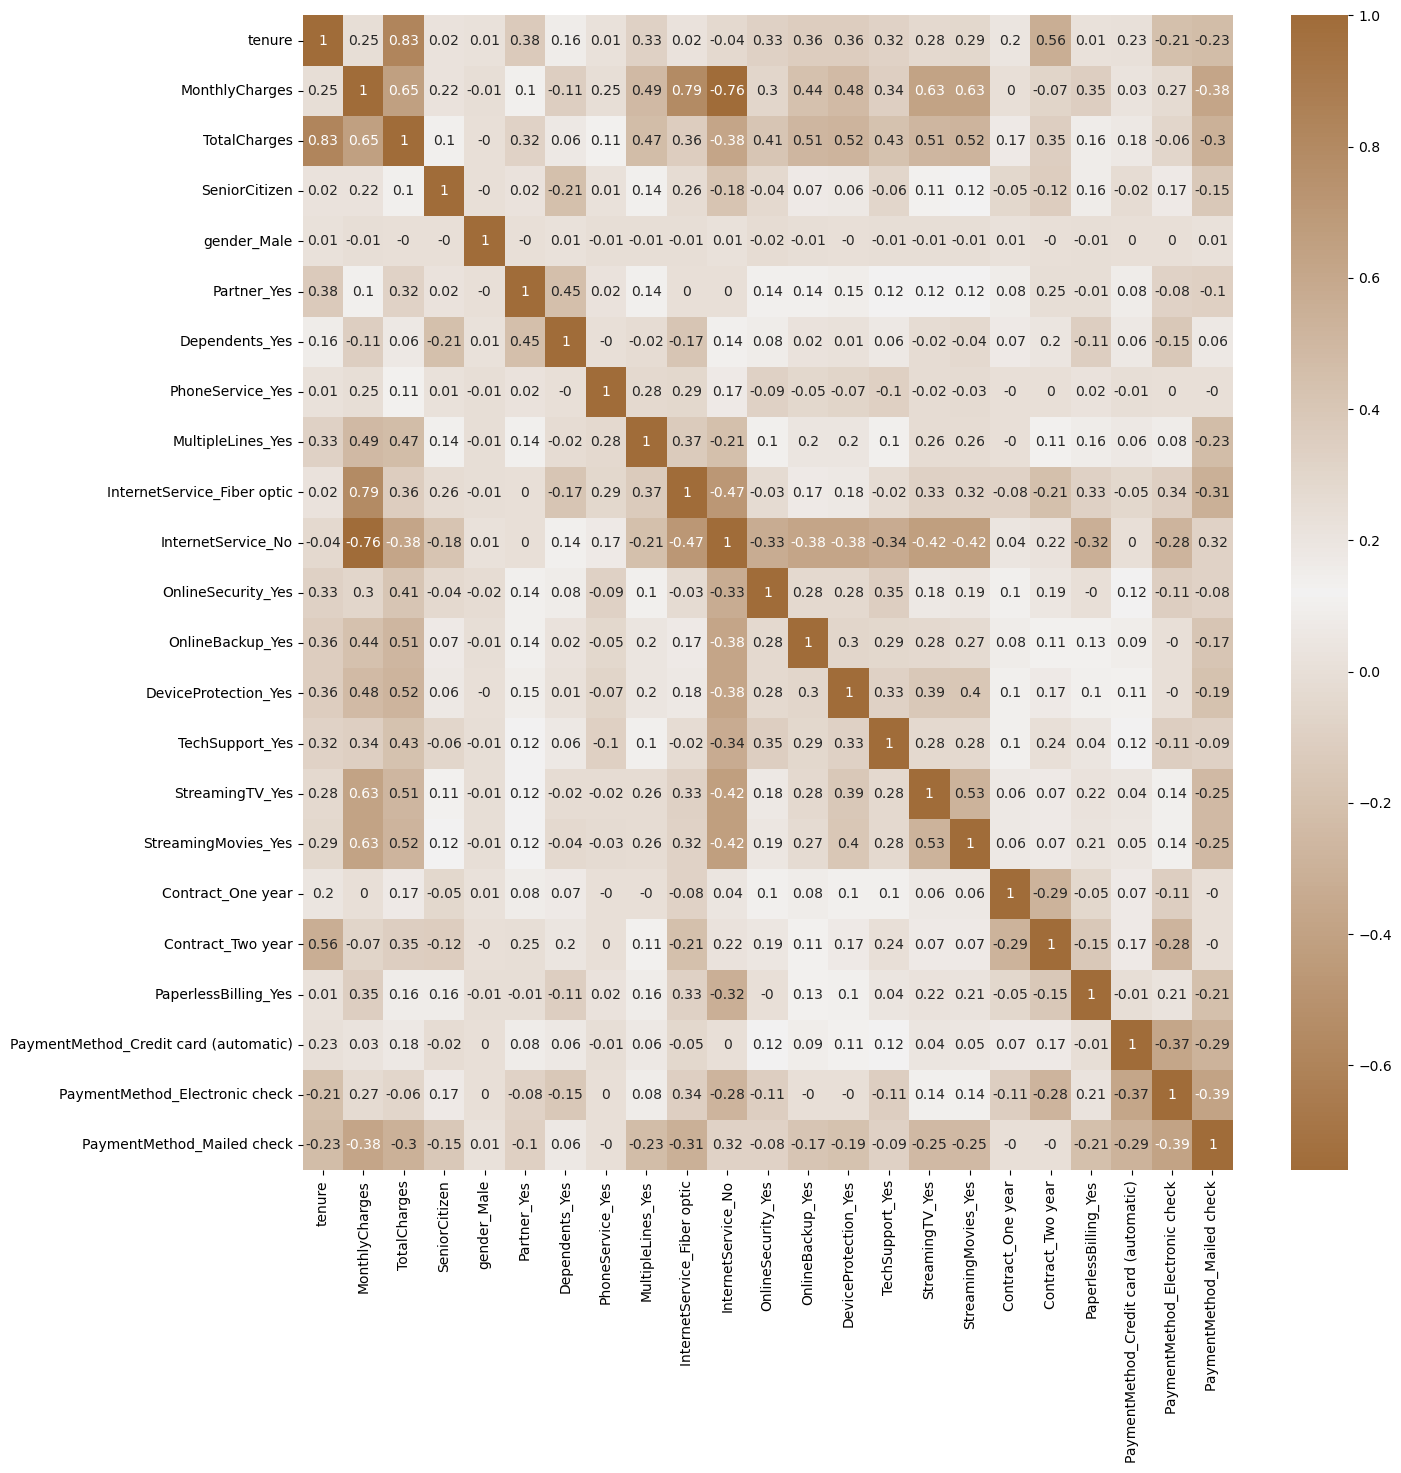

In [16]:
plt.figure(figsize =(15,15))
sns.heatmap(features.corr().round(2),annot= True, cmap =cmap)

# Variance Inflation Factor

In [17]:
def vif(features):
    features = sm.add_constant(features)
    features.dropna(inplace = True)
    
    vif = pd.DataFrame([variance_inflation_factor(features.values, i)
                       for i in range(features.shape[1])], 
                      columns = ['VIF'])
    vif.index = features.columns
    return vif

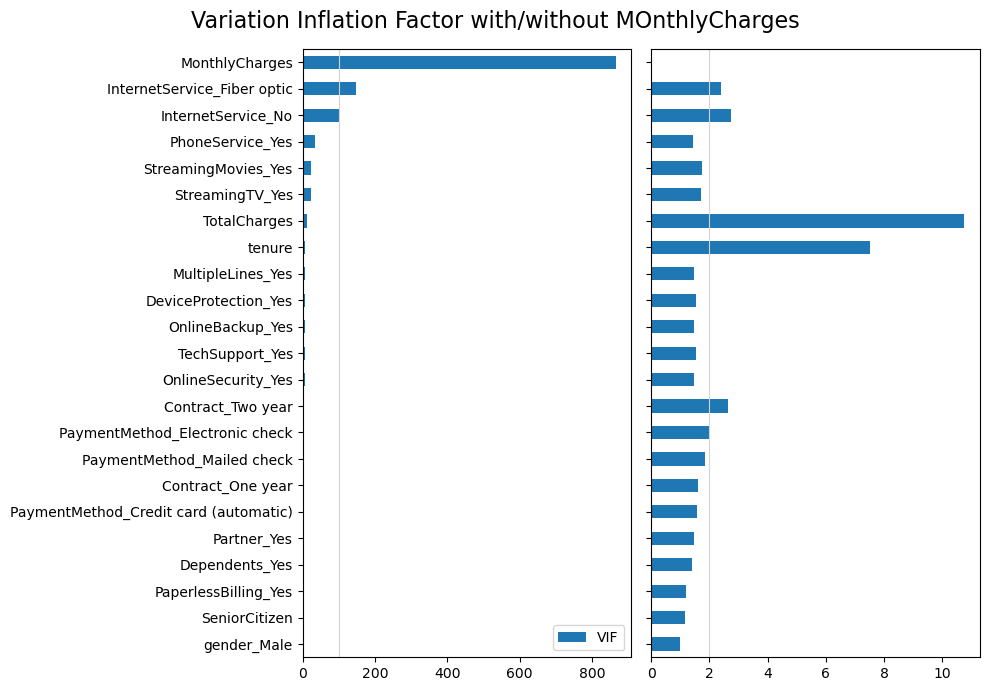

In [18]:
fig, ax = plt.subplots(1,2,figsize =(10, 7),sharey = True)

vif_1 = vif(features).drop('const').sort_values(by = "VIF", ascending =False)
ax[0].axvline(x=100, c= "lightgray", lw= .8)
vif_1.plot(kind = "barh", ax= ax[0])
ax[0].invert_yaxis()
plt.yticks(fontsize = 14)

vif_2 = vif(features.drop('MonthlyCharges',axis = 1)).drop('const')
vif_2 = pd.Series(np.append(0, vif_2), index = ['MonthlyCharges'] + vif_2.index.tolist())
vif_2 = vif_2[vif_1.index]

ax[1].axvline(x=2, c= "lightgray", lw= .8)
vif_2.plot(kind = "barh", ax= ax[1])
ax[1].invert_yaxis()

fig.suptitle("Variation Inflation Factor with/without MOnthlyCharges",fontsize = 16)
fig.tight_layout()

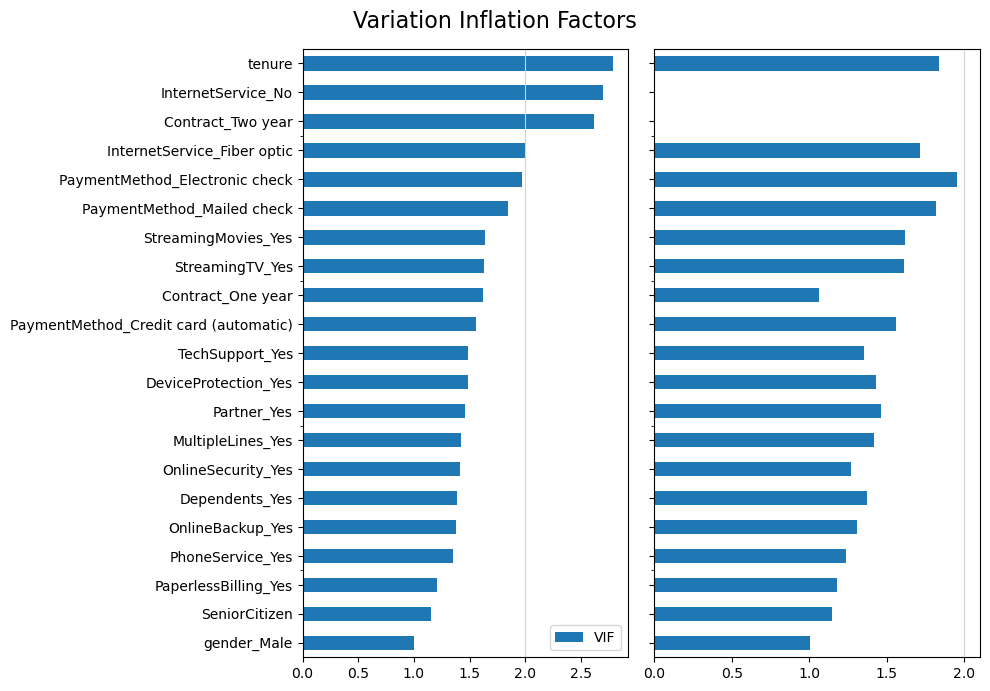

In [19]:
fig, ax = plt.subplots(1,2,figsize =(10, 7),sharey = True)

vif_3 = vif(features.drop(['MonthlyCharges',"TotalCharges"],axis = 1)).\
            drop('const').sort_values(by = "VIF", ascending = False)

ax[0].axvline(x=2, c= "lightgray", lw= .8)
vif_3.plot(kind = "barh", ax= ax[0])
ax[0].invert_yaxis()
plt.yticks(fontsize = 14)

vif_4 = vif(features.drop(['MonthlyCharges',"TotalCharges","InternetService_No","Contract_Two year"],axis = 1)).\
            drop('const')
vif_4 = pd.Series(np.append([0,0], vif_4), index = ["InternetService_No","Contract_Two year"] + vif_4.index.tolist())
vif_4 = vif_4[vif_3.index]

ax[1].axvline(x=2, c= "lightgray", lw= .8)
vif_4.plot(kind = "barh", ax= ax[1])
ax[1].invert_yaxis()

fig.suptitle("Variation Inflation Factors",fontsize = 16)
fig.tight_layout()

In [20]:
features_vif = features.drop(['MonthlyCharges',"TotalCharges","InternetService_No","Contract_Two year"],axis = 1)
pd.concat([target, features_vif], axis = 1).astype(int).to_pickle('churn.pkl')

# Logistic regression feature selection

In [21]:
X = features# features_vif
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.4, random_state = 0)

In [22]:
logit = Pipeline(steps = [('scaler', MinMaxScaler()),
    ('logit', LogisticRegression(penalty = "l1", solver = "liblinear"))])

cv = 8
scoring = "f1_macro" #roc_auc
c_range = np.linspace(1e-6, 2, 20)

param_grid = [{"logit__C":c_range}]

logit_gs = GridSearchCV(logit, param_grid = param_grid,cv=cv, scoring=scoring, return_train_score = True)
logit_gs.fit(x_train, y_train)

print("best parameter, best score")
print(logit_gs.best_params_, logit_gs.best_score_)

best parameter, best score
{'logit__C': 0.6315796315789474} 0.7331299446725115


In [23]:
# Not important Features (coef == 0)
coefficients = logit_gs.best_estimator_.named_steps['logit'].coef_.flatten()
index = logit_gs.feature_names_in_
coefficients_ = pd.Series(coefficients, index = index)
print(coefficients_[np.abs(coefficients) ==0])

MonthlyCharges                0.0
PaymentMethod_Mailed check    0.0
dtype: float64


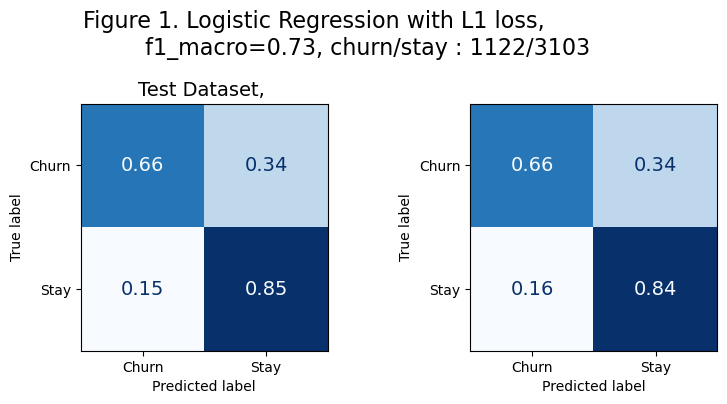

In [24]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize = (8,4))
plt.rc('font',size = 14)
y_pred = logit_gs.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_pred, y_train, normalize = "true",
                                       labels =[1,0], display_labels = ["Churn","Stay"],
                                       cmap = "Blues", ax = ax0, colorbar = False)
ax0.set_title(f"Training Dataset, ", fontsize = 14)

y_pred = logit_gs.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, normalize = "true",
                                       labels =[1,0], display_labels = ["Churn","Stay"],
                                       cmap = "Blues", ax = ax1, colorbar = False)
ax0.set_title(f"Test Dataset, ", fontsize = 14)

fig.suptitle(f"Figure 1. Logistic Regression with L1 loss, \
             \n {scoring}={logit_gs.best_score_:.2f}, churn/stay : {sum(y_train)}/{sum(1-y_train)}", fontsize = 16)
fig.tight_layout()

# Naive Bayes

## With original Tenure

In [25]:
naive = Pipeline(steps = [('scaler', MinMaxScaler()),
    ('naive',MultinomialNB())])

cv = 8
scoring = "f1_macro" #roc_auc
alpha_range = np.linspace(1e-6, 2, 20)

param_grid = [{"naive__alpha":alpha_range}]

naive_gs = GridSearchCV(naive, param_grid = param_grid,cv=cv, scoring=scoring, return_train_score = True)
naive_gs.fit(x_train, y_train)

print("best parameter, best score")
print(naive_gs.best_params_, naive_gs.best_score_)

best parameter, best score
{'naive__alpha': 1e-06} 0.7214971817636064


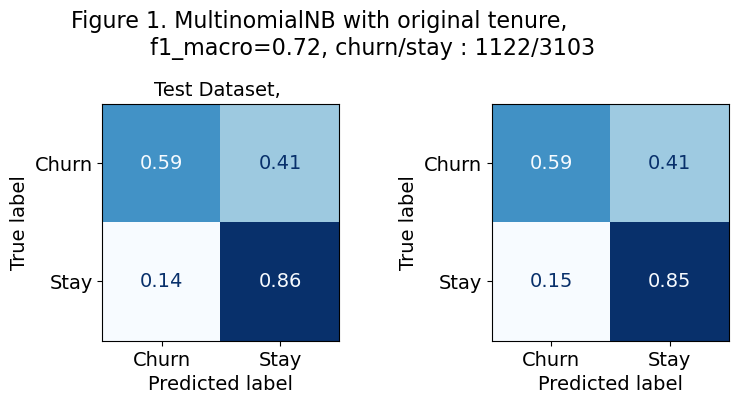

In [26]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize = (8,4))
plt.rc('font',size = 14)
y_pred = naive_gs.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_pred, y_train, normalize = "true",
                                       labels =[1,0], display_labels = ["Churn","Stay"],
                                       cmap = "Blues", ax = ax0, colorbar = False)
ax0.set_title(f"Training Dataset, ", fontsize = 14)

y_pred = naive_gs.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, normalize = "true",
                                       labels =[1,0], display_labels = ["Churn","Stay"],
                                       cmap = "Blues", ax = ax1, colorbar = False)
ax0.set_title(f"Test Dataset, ", fontsize = 14)

fig.suptitle(f"Figure 1. MultinomialNB with original tenure, \
             \n {scoring}={naive_gs.best_score_:.2f}, churn/stay : {sum(y_train)}/{sum(1-y_train)}", fontsize = 16)
fig.tight_layout()

## With grouping Tenure

In [27]:
features.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.162147,0.504756,0.483033,0.299588,0.903166,0.421837,0.439585,...,0.343888,0.290217,0.384353,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,24.559481,30.090047,2266.794470,0.368612,0.500013,0.499748,0.458110,0.295752,0.493888,0.496372,...,0.475038,0.453895,0.486477,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
discretizer= FunctionTransformer(func = np.digitize, kw_args = {'bins':range(0,85,3)})

col_transform = ColumnTransformer(
    transformers = [('discretizer',discretizer,["tenure"])],
    remainder = "passthrough")

In [29]:
naive_discrete = Pipeline(steps = [('discretizer',col_transform),
                                   ('scaler', MinMaxScaler()),
                                   ('naive',MultinomialNB())])
cv = 8
scoring = "f1_macro" #roc_auc
alpha_range = np.linspace(1e-6, 2, 20)

param_grid = [{"naive__alpha":alpha_range}]

naive_discrete_gs = GridSearchCV(naive, param_grid = param_grid,cv=cv, scoring=scoring, return_train_score = True)
naive_discrete_gs.fit(x_train, y_train)

print("best parameter, best score")
print(naive_gs.best_params_, naive_gs.best_score_)

best parameter, best score
{'naive__alpha': 1e-06} 0.7214971817636064


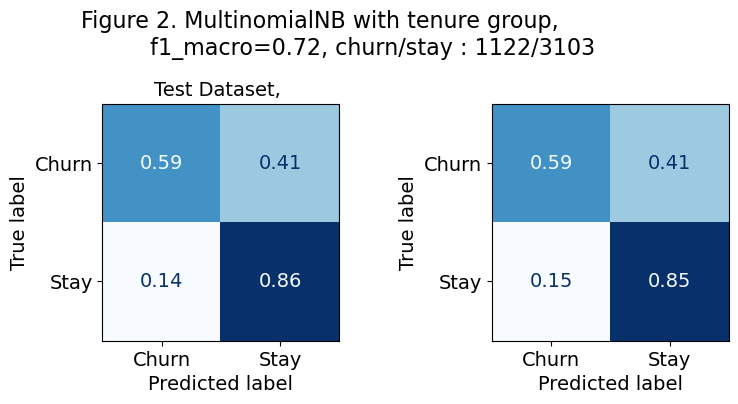

In [30]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize = (8,4))
plt.rc('font',size = 14)
y_pred = naive_discrete_gs.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_pred, y_train, normalize = "true",
                                       labels =[1,0], display_labels = ["Churn","Stay"],
                                       cmap = "Blues", ax = ax0, colorbar = False)
ax0.set_title(f"Training Dataset, ", fontsize = 14)

y_pred = naive_discrete_gs.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, normalize = "true",
                                       labels =[1,0], display_labels = ["Churn","Stay"],
                                       cmap = "Blues", ax = ax1, colorbar = False)
ax0.set_title(f"Test Dataset, ", fontsize = 14)

fig.suptitle(f"Figure 2. MultinomialNB with tenure group, \
             \n {scoring}={naive_discrete_gs.best_score_:.2f}, churn/stay : {sum(y_train)}/{sum(1-y_train)}", fontsize = 16)
fig.tight_layout()

In [31]:
pd.concat([target, features], axis = 1).astype(int).to_pickle('churn.pkl')

# SVM

In [ ]:
c_range = np.linspace(1e-6, 2, 20)
param_grid = [{"svc__C":c_range}]

svc = SVC(kernel = 'rbf', degree = 3, gamma = 'scale', coef0 = 0.0, shrinking = True)
svc = Pipeline(steps = [('scaler', MinMaxScaler()),('svc',svc)])

svc_gs = GridSearchCV(svc, param_grid = param_grid,cv=cv, scoring=scoring, return_train_score = True)
svc_gs.fit(x_train, y_train)

print("best parameter, best score")
print(svc_gs.best_params_, svc_gs.best_score_)

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize = (8,4))
plt.rc('font',size = 14)
y_pred =svc_gs.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_pred, y_train, normalize = "true",
                                       labels =[1,0], display_labels = ["Churn","Stay"],
                                       cmap = "Blues", ax = ax0, colorbar = False)
ax0.set_title(f"Training Dataset, ", fontsize = 14)

y_pred =svc_gs.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, normalize = "true",
                                       labels =[1,0], display_labels = ["Churn","Stay"],
                                       cmap = "Blues", ax = ax1, colorbar = False)
ax0.set_title(f"Test Dataset, ", fontsize = 14)

fig.suptitle(f"Figure 3. SVM with original tenure, \
             \n {scoring}={naive_discrete_gs.best_score_:.2f}, churn/stay : {sum(y_train)}/{sum(1-y_train)}", fontsize = 16)
fig.tight_layout()